# Webscrapping using BeautifulSoup

*This file created by: Febrymal Rifdillah*

<img src="https://png.pngitem.com/pimgs/s/124-1245885_ethereum-logo-eth-coin-logo-png-transparent-png.png" width=150 align=left><br><br><br><br>

## Sraping Data Volume Penjualan Ethereum
**Periode 1 Januari 2021 sd 30 Juni 2021**

Pertama, yang harus kita lakukan adalah import alamat web yang akan kita scrape.
Masukkan alamat web kedalam `request.get`

In [2]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

Selanjutnya, kita akan lihat hasil yang kita dapatkan dari `request.get`yang kita lakukan sebelumnya

In [3]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<script>window.NREUM||(NREUM={});NREUM.info={"beacon":"bam-cell.nr-data.net","errorBeacon":"bam-cell.nr-data.net","licenseKey":"cd4a6493ab","applicationID":"83495717","transactionName":"dV5dRBNcDlkEEU5SDF9fQB8JWhFBDhEIUgJabldRFVI=","queueTime":5,"applicationTime":535,"agent":""}</script>\n<script>(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NR'

Dari hasil yang kita dapatkan diatas, hasilnya terlihat tidak teratur dan tidak rapih. Untuk merapihkan dan sekaligus mempermudah kita untuk membaca kode-kode html tersebut, kita butuh Beautiful Soup. Beautiful Soup merubah kode HTML yang kompleks menjadi sebuah object python.

Selanjutnya, kita akan import `request.get` tadi ke Beautiful Soup.
Dengan menggunakan kode seperti ini

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Mendapatkan kunci yang tepat dan mengambil informasi yang diperlukan 

Pertama, kita harus mengerti terlebih dahulu, data apa yang akan kita ambil.
Setelah kita mengetahui data apa yang perlu kita ambil, kita harus **mencari** dahulu data tersebut berada di baris mana.
Kita bisa mencari dengan kata kunci `.find()`

In [5]:
table = soup.find('table', attrs={'class':'table table-striped text-sm text-lg-normal'})
print(table.prettify()[1:500])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-30
   </th>
   <td class="text-center">
    $253,607,549,372
   </td>
   <td class="te


In [6]:
index = table.find_all('tr')

Baik, setelah mendapatkan list di atas, sebelum kita melangkah ke proses selanjutnya, kita refresh sejenak untuk *review* kembali Informasi apa saja yang kita perlukan dari web Penjualan Ethereum?
- Data Tanggal Transaksi
- Data Market Cap
- Data Volume
- Data Harga Open
- Data Harga Close

Dengan informasi diatas, kita bisa dengan enak dan mudah untuk mencari kolom-kolom dan baris-baris dimana data tersebut berada.

Pertama, kita lihat akan mencari posisi **Headers**

In [7]:
index[0].find_all('th', attrs={'class' : 'text-center'})

[<th class="text-center">Date</th>,
 <th class="text-center">Market Cap</th>,
 <th class="text-center">Volume</th>,
 <th class="text-center">Open</th>,
 <th class="text-center">Close</th>]

Setelah **Headers** itu kita turun untuk mencari **Kolom-Kolom** selanjutnya

**1. Mencari data di kolom `Dates`**

In [8]:
index[1].find_all('th', attrs={'class' : 'font-semibold text-center', 'scope':'row'})[0].text

'2021-06-30'

**2. Mencari data di kolom `Market Cap`**

In [9]:
index[1].find_all('td', attrs={'class' : 'text-center'})[0].text

'\n$253,607,549,372\n'

**3. Mencari data di kolom `Volume`**

In [10]:
index[1].find_all('td', attrs={'class' : 'text-center'})[1].text

'\n$27,149,143,847\n'

**4. Mencari data di kolom `Open`**

In [11]:
index[1].find_all('td', attrs={'class' : 'text-center'})[2].text

'\n$2,169.40\n'

**5. Mencari data di kolom `Close`**

In [12]:
index[1].find_all('td', attrs={'class' : 'text-center'})[3].text

'\nN/A\n'

Setelah kita mengetahui kunci yang tepat dan mendapatkan data-data untuk masing-masing kolom yang berisi informasi-informasi yang kita dapatkan. Selanjutnya kita akan hitung berapa baris data-data tersebut.

In [13]:
tanggal = table.find_all('th', attrs={'class' : 'font-semibold text-center', 'scope':'row'})
row_length = len(tanggal)
row_length

547

Setelah kita dapatkan kunci dari baris-baris data dan jumlah barisnya, selanjutnya kita akan melakukan *looping*.
Sebuah proses srapping data yang akan menghasilkan *list* sesuai dengan data yang kita inginkan.

In [14]:
temp = [] #initiating a tuple

for i in range(1, row_length):

    #scrapping process
    #get Dates
    Date = index[i].find_all('th', attrs={'class' : 'font-semibold text-center', 'scope':'row'})[0].text
    Date = Date.strip()
    
    
    #get Market Cap
    MarketCap = index[i].find_all('td', attrs={'class' : 'text-center'})[0].text
    MarketCap = MarketCap.strip()
    
    
    #get Volume
    Volume = index[i].find_all('td', attrs={'class' : 'text-center'})[1].text
    Volume = Volume.strip()
    
    #get Open Values
    Open = index[i].find_all('td', attrs={'class' : 'text-center'})[2].text
    Open = Open.strip()
    
    #get Close Values
    Close = index[i].find_all('td', attrs={'class' : 'text-center'})[3].text
    Close = Close.strip()
    
    temp.append((Date, MarketCap,Volume,Open,Close))
    
temp 

[('2021-06-30', '$253,607,549,372', '$27,149,143,847', '$2,169.40', 'N/A'),
 ('2021-06-29',
  '$243,040,539,437',
  '$30,629,329,806',
  '$2,087.52',
  '$2,169.40'),
 ('2021-06-28',
  '$229,354,016,311',
  '$24,316,408,028',
  '$1,973.93',
  '$2,087.52'),
 ('2021-06-27',
  '$209,989,265,221',
  '$24,249,510,321',
  '$1,817.05',
  '$1,973.93'),
 ('2021-06-26',
  '$213,871,849,532',
  '$25,981,381,067',
  '$1,833.46',
  '$1,817.05'),
 ('2021-06-25',
  '$231,644,258,719',
  '$22,447,489,242',
  '$1,990.08',
  '$1,833.46'),
 ('2021-06-24',
  '$229,518,675,837',
  '$28,098,744,045',
  '$1,971.11',
  '$1,990.08'),
 ('2021-06-23',
  '$216,876,757,209',
  '$38,755,019,937',
  '$1,875.36',
  '$1,971.11'),
 ('2021-06-22',
  '$223,202,708,789',
  '$39,499,960,408',
  '$1,900.12',
  '$1,875.36'),
 ('2021-06-21',
  '$261,478,202,409',
  '$26,235,850,447',
  '$2,251.56',
  '$1,900.12'),
 ('2021-06-20',
  '$253,396,709,039',
  '$20,456,963,375',
  '$2,176.31',
  '$2,251.56'),
 ('2021-06-19',
  '$260,

Dari proses *looping* diatas, kita sudah mendapatkan data `Tanggal`,`Market Cap`,`Volume`,`Harga Open`,`Harga Close`.
Tetapi data diatas masih berupa list, untuk bisa kita ambil data-datanya, selanjutnya kita akan merubah menjadi `Data Frame`

Sebelum kita merubah menjadi DataFrame, kita bisa melihat data tersebut tidak urut dari Bulan Januari, tetapi dari Bulan Juni.
Kita akan urutkan terlebih dahulu.

In [15]:
temp=temp[::-1]
temp

[('2020-01-02', '$14,230,588,104', '$6,623,732,041', '$130.48', '$127.05'),
 ('2020-01-03', '$13,859,793,330', '$6,497,297,884', '$127.05', '$133.70'),
 ('2020-01-04', '$14,613,194,776', '$9,655,245,100', '$133.70', '$134.14'),
 ('2020-01-05', '$14,636,213,160', '$6,958,393,690', '$134.14', '$135.01'),
 ('2020-01-06', '$14,738,834,254', '$7,260,645,128', '$135.01', '$143.81'),
 ('2020-01-07', '$15,692,578,635', '$9,514,201,882', '$143.81', '$143.02'),
 ('2020-01-08', '$15,656,491,188', '$9,440,938,788', '$143.02', '$140.27'),
 ('2020-01-09', '$15,364,547,562', '$10,095,847,759', '$140.27', '$137.86'),
 ('2020-01-10', '$14,998,595,868', '$7,280,640,218', '$137.86', '$144.60'),
 ('2020-01-11', '$15,647,071,448', '$10,273,370,788', '$144.60', '$142.18'),
 ('2020-01-12', '$15,564,837,468', '$9,737,605,323', '$142.18', '$145.42'),
 ('2020-01-13', '$15,859,031,094', '$8,488,793,478', '$145.42', '$143.59'),
 ('2020-01-14', '$15,715,287,657', '$8,019,794,567', '$143.59', '$165.99'),
 ('2020-01

## Membuat Data Frame

Setelah data terurut dengan rapih, selannjutnya kita akan membuat Data Frame dari data-data tersebut

In [42]:
import pandas as pd

ethereum = pd.DataFrame(temp, columns = ('Date','MarketCap','Volume','Open','Close'))
ethereum.head()

,Date,MarketCap,Volume,Open,Close
0,2020-01-02,"$14,230,588,104","$6,623,732,041",$130.48,$127.05
1,2020-01-03,"$13,859,793,330","$6,497,297,884",$127.05,$133.70
2,2020-01-04,"$14,613,194,776","$9,655,245,100",$133.70,$134.14
3,2020-01-05,"$14,636,213,160","$6,958,393,690",$134.14,$135.01
4,2020-01-06,"$14,738,834,254","$7,260,645,128",$135.01,$143.81


Data sudah tersusun dengan rapih dan sesuai dengan kolom dan baris data yang kita inginkan.
Tetapi proses masih belum selesai, karena kita perlu melihat dahulu apakah data-data tersebut sesuai dengan *tipe* data masing-masing. Karena apabila tidak sesuai, kita tidak bisa melakukan Data Wrangling atau mencari insight lebih jauh dari data-data tersebut.

In [43]:
ethereum.dtypes

Date         object
MarketCap    object
Volume       object
Open         object
Close        object
dtype: object

Nah, setelah kita cek, ternyata data-data tersebut mempunyai tipe yang sama, yaitu `object'

Kita akan melakukan **Data Cleaning**, yang fungsingnya untuk membersihkan data-data dari karakter dan merubah sesuai dengan type yang seharusnya

In [44]:
ethereum['MarketCap'] = ethereum['MarketCap'].str.replace('$','')
ethereum['MarketCap'] = ethereum['MarketCap'].str.replace(',','')
ethereum['MarketCap'] = ethereum['MarketCap'].astype('int64')

C:\Users\OBYMRI~1\AppData\Local\Temp/ipykernel_12824/2521487309.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  ethereum['MarketCap'] = ethereum['MarketCap'].str.replace('$','')


In [45]:
ethereum['Volume'] = ethereum['Volume'].str.replace('$','')
ethereum['Volume'] = ethereum['Volume'].str.replace(',','')
ethereum['Volume'] = ethereum['Volume'].astype('int64')

C:\Users\OBYMRI~1\AppData\Local\Temp/ipykernel_12824/519504083.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  ethereum['Volume'] = ethereum['Volume'].str.replace('$','')


In [46]:
ethereum['Open'] = ethereum['Open'].str.replace('$','')
ethereum['Open'] = ethereum['Open'].str.replace(',','')
ethereum['Open'] = ethereum['Open'].astype('float')

C:\Users\OBYMRI~1\AppData\Local\Temp/ipykernel_12824/1328219437.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  ethereum['Open'] = ethereum['Open'].str.replace('$','')


In [47]:
ethereum['Close'] = ethereum['Close'].str.replace('$','')
ethereum['Close'] = ethereum['Close'].str.replace(',','')
ethereum['Close'] = ethereum['Close'].str.replace('N/A','2169.40')
ethereum['Close'] = ethereum['Close'].astype('float')

C:\Users\OBYMRI~1\AppData\Local\Temp/ipykernel_12824/2254652092.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  ethereum['Close'] = ethereum['Close'].str.replace('$','')


In [48]:
ethereum['Date'] = ethereum['Date'].astype('datetime64')

In [49]:
ethereum.dtypes

Date         datetime64[ns]
MarketCap             int64
Volume                int64
Open                float64
Close               float64
dtype: object

Kita sudah merubah semua type data sesuai dengan yang kita inginkan.
Selanjutnya kita akan *drop* atau hapus beberapa kolom yang tidak kita perlukan. Karena kita hanya akan melihat Tanggal dan Jumlah Volume harian dari data tersebut.

In [50]:
ethereum

,Date,MarketCap,Volume,Open,Close
0,2020-01-02,14230588104,6623732041,130.48,127.05
1,2020-01-03,13859793330,6497297884,127.05,133.70
2,2020-01-04,14613194776,9655245100,133.70,134.14
3,2020-01-05,14636213160,6958393690,134.14,135.01
4,2020-01-06,14738834254,7260645128,135.01,143.81
...,...,...,...,...,...
541,2021-06-26,213871849532,25981381067,1833.46,1817.05
542,2021-06-27,209989265221,24249510321,1817.05,1973.93
543,2021-06-28,229354016311,24316408028,1973.93,2087.52
544,2021-06-29,243040539437,30629329806,2087.52,2169.40


## Analisa Data

Berikutnya proses yang paling penting dan sekaligus tujuan kita.
Analisa data dari semua hal yang berhubungan dengan Transaksi Harian Ethereum selama bulan Januari 2021 sd Juni 2021

In [67]:
ethereum = ethereum.set_index('Date')

In [68]:
ethereum

,MarketCap,Volume,Open,Close
Date,,,,
2020-01-02,14230588104,6623732041,130.48,127.05
2020-01-03,13859793330,6497297884,127.05,133.70
2020-01-04,14613194776,9655245100,133.70,134.14
2020-01-05,14636213160,6958393690,134.14,135.01
2020-01-06,14738834254,7260645128,135.01,143.81
...,...,...,...,...
2021-06-26,213871849532,25981381067,1833.46,1817.05
2021-06-27,209989265221,24249510321,1817.05,1973.93
2021-06-28,229354016311,24316408028,1973.93,2087.52


In [70]:
ethereum

,MarketCap,Volume,Open,Close
Date,,,,
2020-01-02,14230588104,6623732041,130.48,127.05
2020-01-03,13859793330,6497297884,127.05,133.70
2020-01-04,14613194776,9655245100,133.70,134.14
2020-01-05,14636213160,6958393690,134.14,135.01
2020-01-06,14738834254,7260645128,135.01,143.81
...,...,...,...,...
2021-06-26,213871849532,25981381067,1833.46,1817.05
2021-06-27,209989265221,24249510321,1817.05,1973.93
2021-06-28,229354016311,24316408028,1973.93,2087.52


<AxesSubplot:xlabel='Date'>

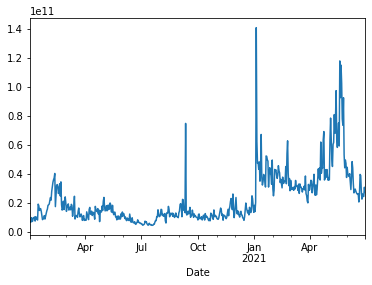

In [71]:
ethereum['Volume'].plot(kind='line')

Insight:

1. Volume tertinggi Ethereum ada di bulan Januari 2021.
2. Volume paling rendah ada di bulan Juli 2020
3. Volume sempat turun tajam pada bulan Januari 2021
4. Trend Volume sejak awal Januari 2021 cenderung **naik** sd akhir bulan Juni 2021

<AxesSubplot:title={'center':'Ethereum Opening and Closing Price'}, xlabel='Month', ylabel='Price (in USD)'>

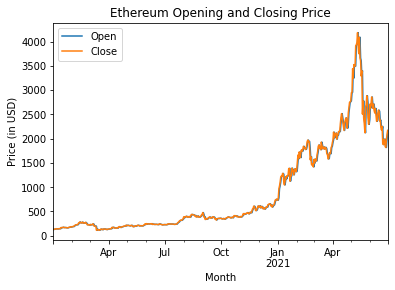

In [73]:
ethereum[['Open','Close']].plot(
                        xlabel = 'Month',
                        ylabel = "Price (in USD)",
                        title = "Ethereum Opening and Closing Price")

Insight:

1. Harga Open dan Harga Closing tidak berbanding jauh.
2. Harga Open tertinggi pada bulan Mei 2021